In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
data_path = ('./table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')

df_raw = pd.read_excel(data_path, skiprows = 4)


In [43]:
print(list(df_raw))
print('Number of rows {} and number of columns {}'.format(df_raw.shape[0], df_raw.shape[1]))

['City', 'Population', 'Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter', 'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3']
Number of rows 351 and number of columns 13


## Data preperation 

In this part I will prepare the data to be able to use multivariable_regression. 
I will explore the data after taking the features I will use. No need to fix the features that are unnecessery for now. 

In [5]:
## getting the columns we need for the model
df_task = df_raw[['City','Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery']]
df_task.columns = ['City','Population', 'Murder', 'Robbery']

In [34]:
print(df_task.shape)
print(df_task.City.unique())

,City,Population,Murder,Robbery
343,Woodbury Town,10685.0,0.0,2.0
344,Woodridge Village,829.0,0.0,0.0
345,Woodstock Town,5931.0,0.0,0.0
346,Yonkers,199134.0,6.0,390.0
347,Yorktown Town,36643.0,0.0,2.0


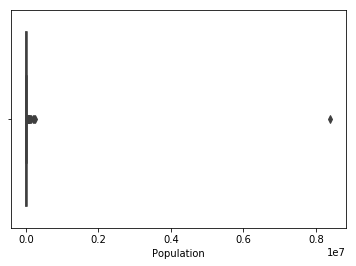

In [19]:
## using a boxplot can show if there are values that are abnormal
p1= sns.boxplot(df_task["Population"])

plt.show()

In [14]:
## There is a value that seems to be much higher than the rest. 

df_task.loc[df_task['Population'] == df_task['Population'].max(), :]

,City,Population,Murder,Robbery
216,New York,8396126.0,335.0,19170.0


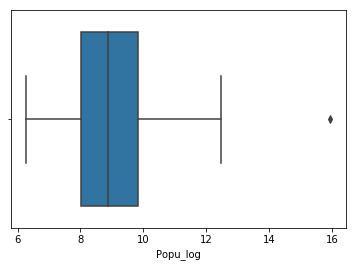

In [20]:
## New york has more than 8 milion in population. if we take the log of the population we 
## can graph the boxplot again and we will be able to see more info
df_task['Popu_log'] = np.log(df_task['Population'])

p2= sns.boxplot(df_task["Popu_log"])

plt.show()

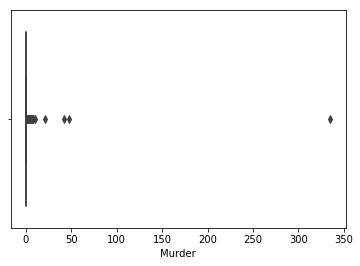

In [21]:
## Even with 
p3= sns.boxplot(df_task["Murder"])

plt.show()

In [27]:
df_task.loc[df_task['Murder'] == df_task['Murder'].max(), :]



/Users/Badrshuaib/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
df_task['Murder_log'] = np.log(df_task['Murder'] + 1)

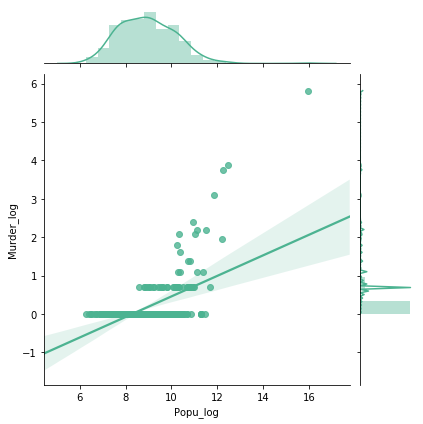

In [32]:
x = df_task['Popu_log']
y = df_task['Murder_log']
sns.jointplot(x, y, kind="reg", color="#4CB391")

plt.show()


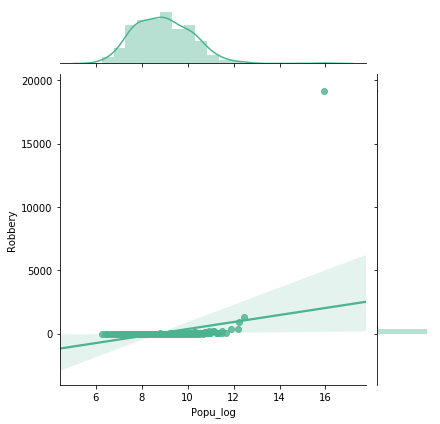

In [34]:

y2 = df_task['Robbery']
sns.jointplot(x, y2, kind="reg", color="#4CB391")

plt.show()



## Feature Engineering
Although New york seems to be an anamolous value, it is still necessery for our model. I have used the log function to create an easy to visiulize version of the population.
in this part i will create the three new features. Population ^ 2 and two catagorical features from the robbery and Murder features. 

In [37]:
## 1. creating population squared
df_task['Pop_squared'] = np.square(df_task['Population'])

## 2. creating Robbery catagory with values == 0 are 0 and values > 0 are 1

df_task['robb_cat'] = (df_task['Robbery'] != 0)

## 3. creating Murder catagory with values == 0 are 0 and values > 0 are 1

df_task['murd_cat'] = (df_task['Murder'] != 0)

In [38]:
df_task.head()

,City,Population,Murder,Robbery,Popu_log,Murder_log,Pop_squared,robb_cat,murd_cat
0,Adams Village,1861.0,0.0,0.0,7.528869,0.000000,3.463321e+06,False,False
1,Addison Town and Village,2577.0,0.0,0.0,7.854381,0.000000,6.640929e+06,False,False
2,Akron Village,2846.0,0.0,0.0,7.953670,0.000000,8.099716e+06,False,False
3,Albany,97956.0,8.0,227.0,11.492274,2.197225,9.595378e+09,True,True
4,Albion Village,6388.0,0.0,4.0,8.762177,0.000000,4.080654e+07,True,False
